In [124]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import numpy as np
sns.set(color_codes=True)

run = '1776333613540897207'     # Latest run ID
show_events = False             # Whether or not to show events as red lines
aspect = (1 + 5 ** 0.5) / 2     # Aspect ratio of graphs

statsDir = '/tmp/stats-' + run


heapData = pd.read_csv(statsDir + '/heap', index_col=False)
heapData = heapData.drop('minor (unpromoted)', axis=1).drop('major', axis=1)


eventsData = pd.read_csv(statsDir + '/events', index_col=False)

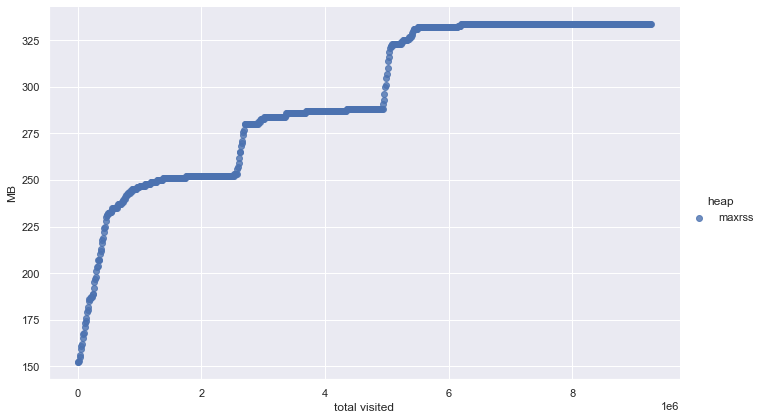

In [125]:
# Plot by 'total visited'

def plot(ylabel, data):
    data = data.drop('sys time', axis=1).melt('total visited', var_name = 'heap', value_name='MB')
    
    fgrid = sns.lmplot(
        height = 6,
        aspect = aspect,
        x='total visited',
        y='MB',
        hue='heap',
        fit_reg=False,
        data=data
    )

    ax = fgrid.axes[0][0]
    # ax.set_yscale('log')
    ax.set_ylabel(ylabel)


plot('MB',heapData)



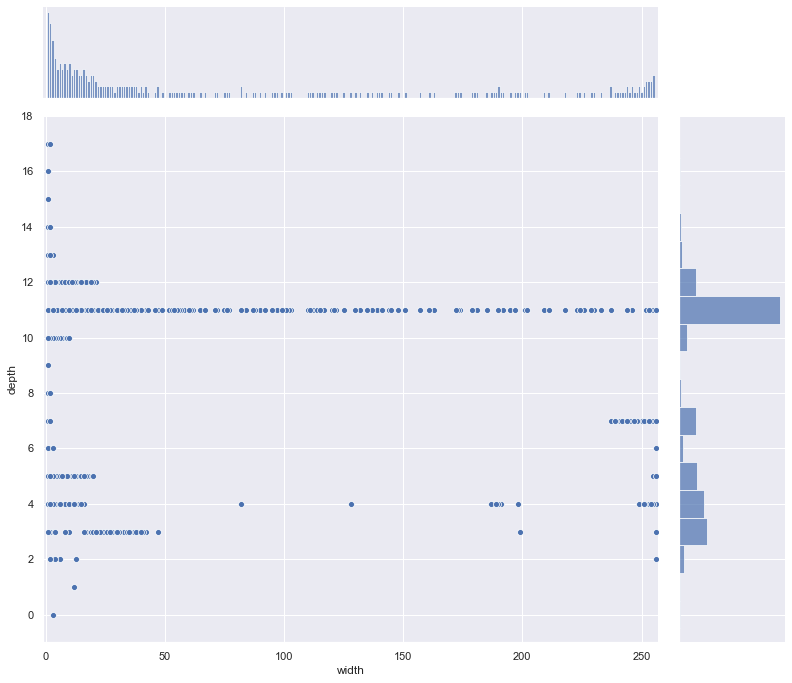

In [83]:
# Show shape distribution of tree sizes, along with marginal distributions

shape_data = pd.read_csv('/tmp/stats-' + run + '/shape', index_col=False)


x_max = shape_data['width'].max()
y_max = shape_data['depth'].max()

xlim = (-1, x_max  + 1)
ylim = (-1, y_max + 1)

g = sns.JointGrid("width", "depth", 
              xlim=xlim,
              ylim=ylim,
              height=7,
              data=shape_data)


g = g.plot_joint(sns.scatterplot)
fg = g.fig
ax = fg.gca()

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

_ = g.ax_marg_x.hist(shape_data["width"], alpha=0.7, bins=np.arange(-0.5, x_max, 1))
_ = g.ax_marg_y.hist(shape_data["depth"], alpha=0.7, bins=np.arange(-0.5, y_max, 1), orientation="horizontal")

from matplotlib.ticker import MaxNLocator


_ = fg.set_figwidth(12)
_ = fg.set_figheight(10)
